In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import re
from urllib.parse import urlparse

%matplotlib inline

In [ ]:
# Import the dataset
df=pd.read_csv('Dataset (1).csv')
df.head()

,URL,CLASS
0,https://linktr.ee/btinternetlee,Phishing
1,https://tinyurl.com/3j3k2mzd,Phishing
2,https://nevstr.weebly.com/,Phishing
3,https://link.account-update824.com/em=,Phishing
4,https://amazomerowihuiegarbcc.xyz/,Phishing


In [ ]:
df.tail()

,URL,CLASS
21576,http://codepen.io/api/oembed?url=http%3A%2F%2F...,Legitimate
21577,http://comicbook.com/2014/10/30/pee-wee-herman...,Legitimate
21578,http://comicbook.com/2014/12/25/top-ten-comic-...,Legitimate
21579,http://comicbook.com/2014/12/30/captain-americ...,Legitimate
21580,http://comicbook.com/2015/03/06/jared-leto-wan...,Legitimate


Legitimate    11000
Phishing      10581
Name: CLASS, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


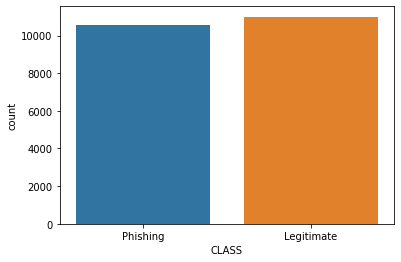

In [ ]:
print(df['CLASS'].value_counts())
sns.countplot(df['CLASS'])

In [ ]:
df1 = df.replace(['Phishing','Legitimate'],[0,1])

In [ ]:
# Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 0
  except:
    ip = 1
  return ip

# Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 0
  else:
    at = 1
  return at

# Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 54:
    length =1
  else:
    length = 0
  return length

# Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def get_protocol(url):
    protocol = urlparse(url)
    if protocol.scheme == 'https':
        return 1
    else:
        return 0

# Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

# Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"


# Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 0
    else:
        return 1

# Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 0          # phishing
    else:
        return 1          # legitimate

In [ ]:
ip = []
attherate = []
url_length= []
protocol = []
singleSlash= []
doubleSlash= []
tinyurl = []
hyphen= []

In [ ]:
def extract_all_features():
  counter = 0
  for url in df['URL']:
        counter = counter + 1
        ip.append(havingIP(url))
        attherate.append(haveAtSign(url))
        url_length.append(getLength(url))
        singleSlash.append(getDepth(url))
        doubleSlash.append(redirection(url))
        protocol.append(get_protocol(url))
        hyphen.append(prefixSuffix(url))
        tinyurl.append(tinyURL(url))

In [ ]:
extract_all_features()

In [ ]:
features_df = pd.DataFrame()
features_df["IP Check"] = ip
features_df["At The Rate"] = attherate
features_df["URL Length"] = url_length
features_df["Single Slash"] = singleSlash
features_df["Double Slash"] = doubleSlash
features_df["HTTP/HTTPS"] = protocol
features_df["Hyphen "] = hyphen
features_df["Tiny URL"] = tinyurl
features_df["Class"] = df1.CLASS

In [ ]:
features_df.head(20)

,IP Check,At The Rate,URL Length,Single Slash,Double Slash,HTTP/HTTPS,Hyphen,Tiny URL,Class
0,1,1,1,1,1,0,1,1,0
1,1,1,1,1,1,0,1,0,0
2,1,1,1,0,1,0,1,1,0
3,1,1,1,1,1,0,0,1,0
4,1,1,1,0,1,0,1,1,0
5,1,1,1,0,1,0,0,1,0
6,1,1,1,2,1,1,1,1,0
7,1,1,1,1,1,0,1,1,0
8,1,1,1,1,1,0,0,1,0
9,1,1,1,2,1,0,1,1,0


In [ ]:
X=features_df.iloc[:,0:8].values
y=features_df.iloc[:,8].values

In [ ]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (21581, 8)
y shape: (21581,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(3))

In [ ]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (17264, 8)
X_test (4317, 8)
y_train (17264,)
y_test (4317,)


In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_info=mutual_info_classif(X_train, y_train)
mutual_info

array([0.00134401, 0.01788442, 0.25355317, 0.15740696, 0.00698837,
       0.17537361, 0.07765285, 0.0145949 ])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

clf= KNeighborsClassifier(n_neighbors=30,metric='euclidean')

clf=clf.fit(X_train,y_train)

In [ ]:
prediction2=clf.predict(X_test)

In [ ]:
accuracy_score_knn=accuracy_score(y_test,prediction2)*100
print(accuracy_score_knn)

90.47949965253649


              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1941
           1       0.95      0.87      0.91      2376

    accuracy                           0.90      4317
   macro avg       0.90      0.91      0.90      4317
weighted avg       0.91      0.90      0.91      4317



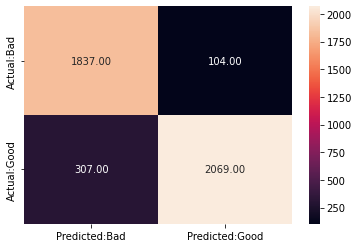

In [ ]:
print(classification_report(prediction2,y_test))
con2  = pd.DataFrame(confusion_matrix(prediction2,y_test), columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

sns.heatmap(con2,annot=True,fmt='.2f')

In [ ]:
# Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
claf= DecisionTreeClassifier(criterion="entropy", max_depth=3)

claf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
prediction3=claf.predict(X_test)

In [ ]:
accuracy_score_dt=accuracy_score(y_test,prediction3)*100
print(accuracy_score_dt)

89.76140838545285


              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1978
           1       0.94      0.87      0.90      2339

    accuracy                           0.90      4317
   macro avg       0.90      0.90      0.90      4317
weighted avg       0.90      0.90      0.90      4317



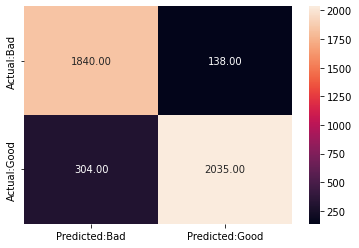

In [ ]:
print(classification_report(prediction3,y_test))
con3  = pd.DataFrame(confusion_matrix(prediction3,y_test),columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

sns.heatmap(con3,annot=True,fmt='.2f')

In [ ]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(criterion="entropy", max_depth=3)

rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [ ]:
prediction4=rf.predict(X_test)

In [ ]:
accuracy_score_rf=accuracy_score(y_test,prediction4)*100

print(accuracy_score_rf)

89.76140838545285


              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1986
           1       0.93      0.87      0.90      2331

    accuracy                           0.90      4317
   macro avg       0.90      0.90      0.90      4317
weighted avg       0.90      0.90      0.90      4317



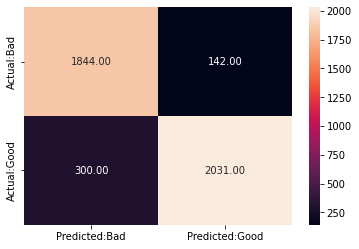

In [ ]:
print(classification_report(prediction4,y_test))
con4 = pd.DataFrame(confusion_matrix(prediction4,y_test), columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

sns.heatmap(con4,annot=True,fmt='.2f')

In [ ]:
# Support Vector Algorithm
from sklearn.svm import SVC
svc= SVC(random_state=0)

svc.fit(X_train,y_train)


SVC(random_state=0)

In [ ]:
prediction5=svc.predict(X_test)

In [ ]:
accuracy_score_sv=accuracy_score(y_test,prediction5)*100

print(accuracy_score_sv)

90.45633541811443


              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2008
           1       0.94      0.88      0.91      2309

    accuracy                           0.90      4317
   macro avg       0.90      0.91      0.90      4317
weighted avg       0.91      0.90      0.90      4317



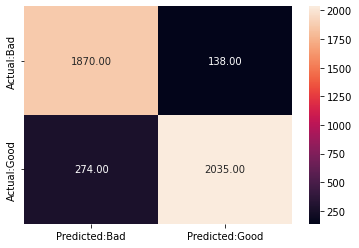

In [ ]:
print(classification_report(prediction5,y_test))
con5  = pd.DataFrame(confusion_matrix(prediction5,y_test), columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])

sns.heatmap(con5,annot=True,fmt='.2f')

In [ ]:
# Comparing Efficiencies of each algorithm
data4 = [['KNearest Neighbour',accuracy_score_knn],['Decesion Tree',accuracy_score_dt] ,['Random Forest',accuracy_score_rf],['Support Vector Machine',accuracy_score_sv]]
df4 = pd.DataFrame(data4, columns = ['Algorithm Used', 'Efficiency'])
df4

,Algorithm Used,Efficiency
0,KNearest Neighbour,90.479500
1,Decesion Tree,89.761408
2,Random Forest,89.761408
3,Support Vector Machine,90.456335
